In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Use and Remove Trends**

A trend is a continued increase or decrease in the series over time. There can be benefit in identifying, modeling, and even removing trend information from your time series dataset.

In general, a systematic change in a time series that does not appear to be periodic is known as a trend.

Identifying and understanding trend information can aid in improving model performance;
below are a few reasons:

- *Faster Modeling:* Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient.
- *Simpler Problem:* Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
- *More Data:* Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance.

**Types of Trends**

There are all kinds of trends. Two general classes that we may think about are:
- *Deterministic Trends:* These are trends that consistently increase or decrease.
- *Stochastic Trends:* These are trends that increase and decrease inconsistently.

In general, deterministic trends are easier to identify and remove, but the methods discussed in this tutorial can still be useful for stochastic trends. We can think about trends in terms of their scope of observations.

- *Global Trends:* These are trends that apply to the whole time series.
- *Local Trends:*These are trends that apply to parts or subsequences of a time series. Generally, global trends are easier to identify and address.

**Identifying a Trend**

Identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective.

**Removing a Trend**

A time series with a trend is called non-stationary. An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.


**Using Time Series Trends in Machine Learning**

From a machine learning perspective, a trend in your data represents two opportunities:
- *Remove Information:* To remove systematic information that distorts the relationship between input and output variables.
- *Add Information:* To add systematic information to improve the relationship between input and output variables.

**Specifically, a trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise. This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models. Alternately, a trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem to predict the output variable.**

**Detrend by Differencing**

$\ value(t) = observation(t) - observation(t - 1) $

Text(0.5, 1.0, 'Line plots Shampoo Sales dataset.')

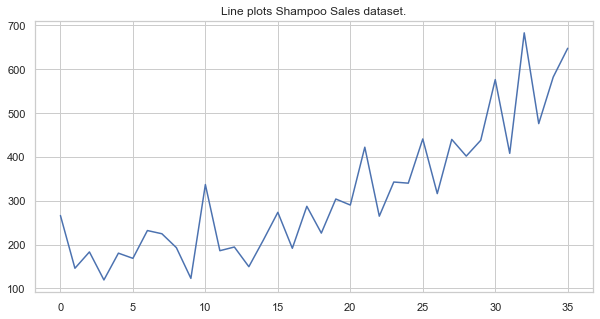

In [3]:
def parser(x):
    return pd.datetime.strptime("190" +x, "%Y-%m")

series = pd.read_csv('monthly-shampoo-sales.csv',header=0,index_col=0
,parse_dates=True,squeeze=True, date_parser=parser)

X = series.values

sns.set_theme(style='whitegrid')
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=X)
ax.set_title('Line plots Shampoo Sales dataset.')

Text(0.5, 1.0, 'Line plots differenced Shampoo Sales dataset.')

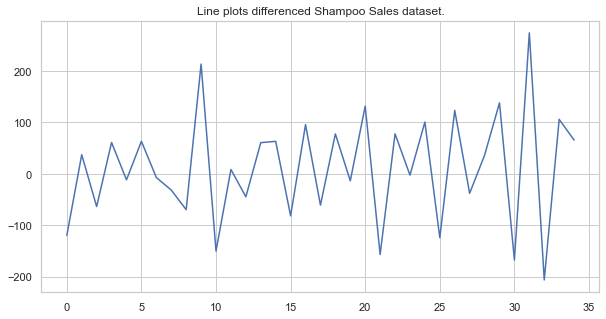

In [4]:
diff = []

for i in range(1, len(X)):
    value = X[i] - X[i -1]
    diff.append(value)

sns.set_theme(style='whitegrid')
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=diff)
ax.set_title('Line plots differenced Shampoo Sales dataset.')

**Detrend by Model Fitting**

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method. Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series. For example, a linear model can be fit on the time index to predict the observation.

**The predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a detrended version of the dataset.**

$\ value(t) = observation(t) - prediction(t) $

In [6]:
from sklearn.linear_model import LinearRegression

# Fit linear model
X = [i for i in range(0,len(series))]

# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
X = np.reshape(X,(len(X),1))  # len(X)--> 36
# OR
# X = X.reshape(len(X),1)  # len(X)--> 36

# Turns it into a 1D array
X.ravel()
# X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [10]:
y = series.values
y.shape

(36,)

Text(0.5, 1.0, 'Line plot of the detrended Shampoo Sales dataset using the linear fit.')

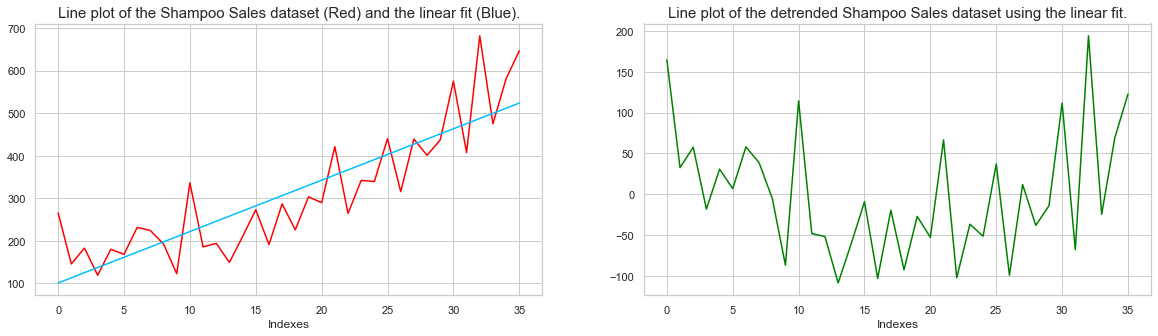

In [12]:
model = LinearRegression()
model.fit(X,y)

# Calculate trend
trend = model.predict(X)

# Plot trend
fig, ax = plt.subplots(1,2,figsize=(20,5))


# Page 453 of Python for Data Analysis; 
# ravel/flatten is used for making as array one dimensional
sns.lineplot(x=X.ravel(),y=y, data=X.ravel(),ax=ax[0],color="red")
ax[0].set_xlabel('Indexes')
sns.lineplot(x=X.ravel(),y=trend, data=X.ravel(),ax=ax[0],color='deepskyblue')
ax[0].set_title("Line plot of the Shampoo Sales dataset (Red) and the linear fit (Blue)."
,fontsize=15)



# Detrend

detrended = [y[i]-trend[i] for i in range(0,len(series))]

len(detrended)
# Plot Detrended
sns.lineplot(x=X.ravel(),y=detrended, data=X.ravel(),ax=ax[1],color="green")
ax[1].set_xlabel('Indexes')
ax[1].set_title("Line plot of the detrended Shampoo Sales dataset using the linear fit."
,fontsize=15)